In [ ]:
 # Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
x = df["selling_price"].values.reshape(-1, 1)
y = df["year"]

model = LinearRegression()
model.fit(x, y)
x_range = np.linspace(x.min(), x.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(df, x='selling_price', y='year', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range,
                          name='Linear Regression'))
fig.show()

scatter plot graph :\
Correlation: Whether the selling price tends to increase, decrease, or stay the same as the year increases.
Outliers: Any data points where the selling price is significantly different from what you would expect based on the year.
Clusters: Groups of data points where the selling price is similar for a given year.
Trends: Whether the selling price tends to increase or decrease over time.

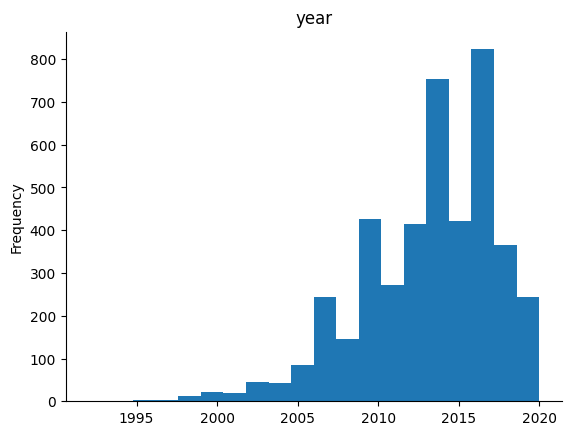

In [ ]:
from matplotlib import pyplot as plt
df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

 This plot shows the frequency distribution of the year values, allowing you to observe the number of cars sold in each year.

<ipython-input-15-0647e4f7c721>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




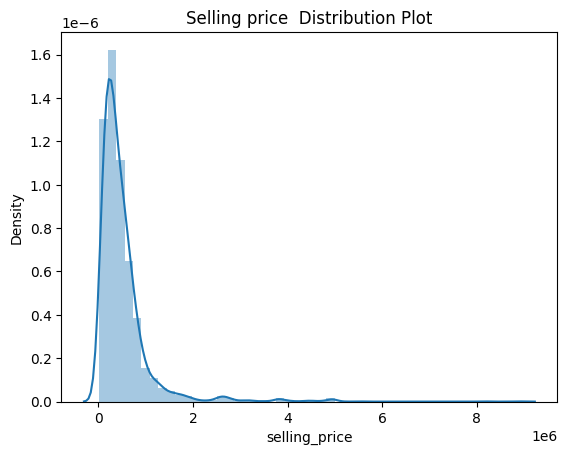

In [ ]:
plt.title('Selling price  Distribution Plot')
sns.distplot(df['selling_price'])
plt.show()

This plot shows the frequency distribution of the selling price data, allowing you to observe the shape of the distribution, central tendency, and spread.

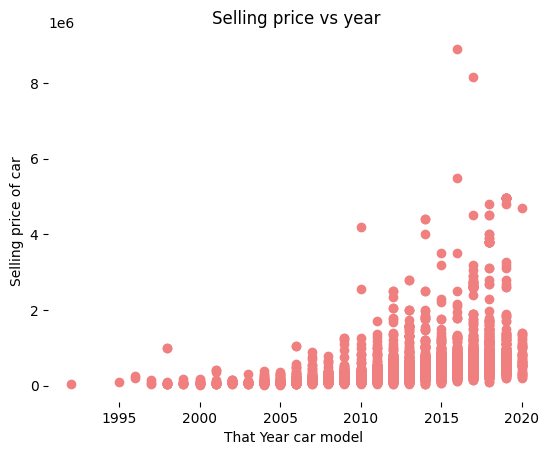

In [ ]:
plt.scatter(df['year'], df['selling_price'], color = 'lightcoral')
plt.title('Selling price vs year')
plt.xlabel('That Year car model ')
plt.ylabel('Selling price of car  ')
plt.box(False)
plt.show()

scatter plot of selling_price vs year for the dataframe df. This plot shows the relationship between the selling price of cars and the year they were made.

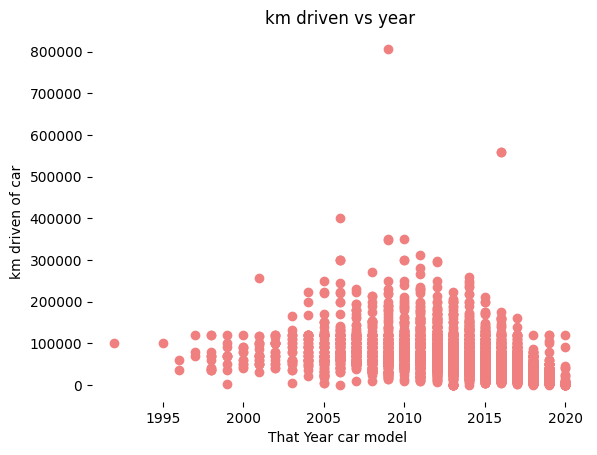

In [ ]:
plt.scatter(df['year'], df['km_driven'], color = 'lightcoral')
plt.title('km driven vs year')
plt.xlabel('That Year car model ')
plt.ylabel('km driven of car  ')
plt.box(False)
plt.show()

This plot shows the relationship between the kilometers driven and the year the cars were made.

Split the dataset into dependent/independent variables Experience (X) is the independent variable
Selling price  is dependent on Car Model Year

In [ ]:
X = df.iloc[:, 1:2] # independent
y = df.iloc[:, 2:3] # dependent

Split data into Train/Test sets
Further, split your data into training (80%) and test (20%) sets using train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predict the result
Here comes the interesting part, when we are all set and ready to predict any value of y (selling) price dependent on X
(year) with the trained model using regressor.predict

In [ ]:
# Prediction result
y_pred_test = regressor.predict(X_test) # predicted value of y_test
y_pred_train = regressor.predict(X_train) # predicted value of y_train

**Plot the training and test results**:
Its time to test our predicted results by plotting graphs

**Plot training set data vs predictions:**
First we plot the result of training sets (X_train, y_train) with X_train and predicted value of y_train
(regressor.predict(X_train))

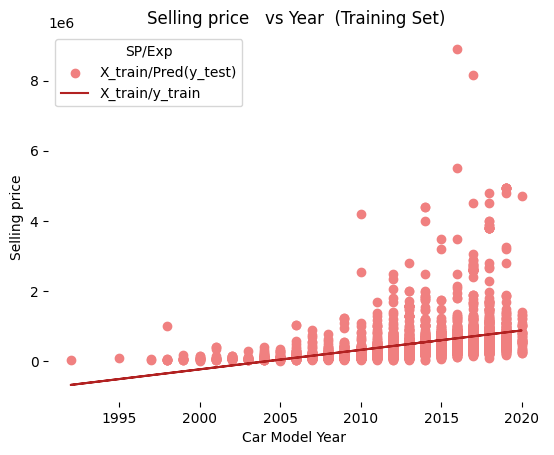

In [ ]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Selling price   vs Year  (Training Set)')
plt.xlabel('Car Model Year ')
plt.ylabel('Selling price')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'SP/Exp', loc='best', facecolor='White')
plt.box(False)
plt.show()

**Plot test set data vs predictions**
Secondly, we plot the result of test sets (X_test, y_test) with X_train and predicted value of y_train
(regressor.predict(X_train))

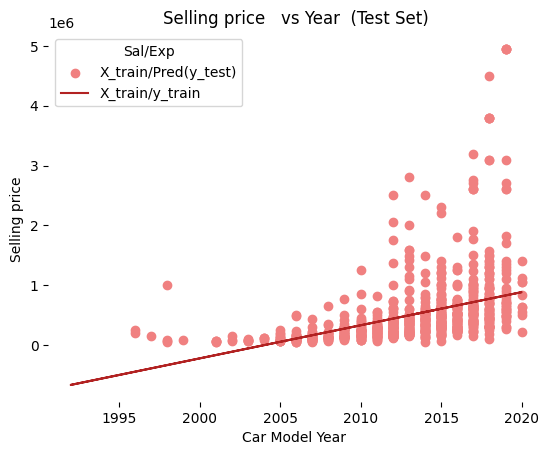

In [ ]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Selling price   vs Year  (Test Set)')
plt.xlabel('Car Model Year ')
plt.ylabel('Selling price ')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='White')
plt.box(False)
plt.show()

Linear equation y = mx + c, we can also get the c (y-intercept) and m (slope/coefficient) from the regressor model.

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[55405.24907089]]
Intercept: [-1.11036073e+08]
